In [109]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [323]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [226]:
curpath=os.getcwd()
curpath

'C:\\Users\\gg664\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\시각화프로젝트\\영화데이터분석\\csvdata'

In [4]:
#data 폴더로 작업경로를 변경합니다. (상대경로 사용)
os.chdir(path = './csvdata')
curpath=os.getcwd()
curpath

'C:\\Users\\gg664\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\시각화프로젝트\\영화데이터분석\\csvdata'

In [5]:
os.listdir()

['KOBIS_지역별_점유율_2020-08-16~2020-08-22.csv',
 'KOBIS_지역별_점유율_2020-08-23~2020-08-29.csv',
 'KOBIS_지역별_점유율_2020-08-30~2020-09-05.csv',
 'KOBIS_지역별_점유율_2020-09-06~2020-09-12.csv',
 'KOBIS_지역별_점유율_2020-09-13~2020-09-19.csv',
 'KOBIS_지역별_점유율_2020-09-20~2020-09-26.csv',
 'KOBIS_지역별_점유율_2020-09-27~2020-10-03.csv',
 'KOBIS_지역별_점유율_2020-10-04~2020-10-10.csv',
 'KOBIS_지역별_점유율_2020-10-11~2020-10-17.csv',
 'KOBIS_지역별_점유율_2020-10-18~2020-10-24.csv',
 'KOBIS_지역별_점유율_2020-10-25~2020-10-31.csv',
 'KOBIS_지역별_점유율_2020-11-01~2020-11-07.csv',
 'KOBIS_지역별_점유율_2020-11-08~2020-11-14.csv',
 'KOBIS_지역별_점유율_2020-11-15~2020-11-21.csv',
 'KOBIS_지역별_점유율_2020-11-22~2020-11-28.csv',
 'KOBIS_지역별_점유율_2020-11-29~2020-12-05.csv',
 'KOBIS_지역별_점유율_2020-12-06~2020-12-12.csv',
 'KOBIS_지역별_점유율_2020-12-13~2020-12-19.csv',
 'KOBIS_지역별_점유율_2020-12-20~2020-12-26.csv',
 'KOBIS_지역별_점유율_2020-12-27~2020-12-31.csv']

In [119]:
sdate_range=pd.date_range('2020-08-16','2020-12-26',freq = '7D') #real : 2020-12-26
sdate_range=pd.Series(sdate_range.format())
#list(sdate_range)

edate_range=pd.date_range('2020-08-22','2020-12-31',freq = '7D') #real :   2020-12-31
edate_range=pd.Series(edate_range.format())
#list(edate_range)

date_range = list(zip(sdate_range,edate_range))
#date_range

# 추가작업
date_range.append(('2020-12-27','2020-12-31'))
date_range

[('2020-08-16', '2020-08-22'),
 ('2020-08-23', '2020-08-29'),
 ('2020-08-30', '2020-09-05'),
 ('2020-09-06', '2020-09-12'),
 ('2020-09-13', '2020-09-19'),
 ('2020-09-20', '2020-09-26'),
 ('2020-09-27', '2020-10-03'),
 ('2020-10-04', '2020-10-10'),
 ('2020-10-11', '2020-10-17'),
 ('2020-10-18', '2020-10-24'),
 ('2020-10-25', '2020-10-31'),
 ('2020-11-01', '2020-11-07'),
 ('2020-11-08', '2020-11-14'),
 ('2020-11-15', '2020-11-21'),
 ('2020-11-22', '2020-11-28'),
 ('2020-11-29', '2020-12-05'),
 ('2020-12-06', '2020-12-12'),
 ('2020-12-13', '2020-12-19'),
 ('2020-12-20', '2020-12-26'),
 ('2020-12-27', '2020-12-31')]

In [271]:
## 초기화
seoul_movie=pd.DataFrame()
busan_movie=pd.DataFrame()

In [272]:
for date in date_range:
    
    date_index = date[0]+"~"+date[1]
    filename = "KOBIS_지역별_점유율_"+date_index+".csv"

    movie1 = pd.read_csv(filename, encoding='UTF-8')
    #movie1

    movie1.dropna(inplace=True)
    if filename == 'KOBIS_지역별_점유율_2020-09-27~2020-10-03.csv':
        movie1 = movie1.loc[[6,7],['■ 지역별 점유율','Unnamed: 10','Unnamed: 11']]
    else:
        movie1 = movie1.loc[[5,7],['■ 지역별 점유율','Unnamed: 10','Unnamed: 11']]
        
    movie1.rename({'■ 지역별 점유율':'지역','Unnamed: 10':'매출액','Unnamed: 11':'관객수'},axis='columns',inplace=True)
    movie1['주']= date[0]

    seoul_movie = pd.concat([seoul_movie,movie1[movie1['지역'] == '서울시']])
    busan_movie = pd.concat([busan_movie,movie1[movie1['지역'] == '부산시']])

In [311]:
seoul_movie
seoul_movie['주'].dtypes

,지역,매출액,관객수,주
5,서울시,"3,361,656,490","368,804",2020-08-16
5,서울시,"2,189,550,260","247,399",2020-08-23
5,서울시,"1,842,116,650","200,100",2020-08-30
5,서울시,"1,733,144,880","188,395",2020-09-06
5,서울시,"1,571,785,690","172,993",2020-09-13
5,서울시,"1,686,750,342","194,747",2020-09-20
6,서울시,"4,365,204,790","464,557",2020-09-27
5,서울시,"2,310,220,710","243,950",2020-10-04
5,서울시,"1,635,498,260","175,172",2020-10-11
5,서울시,"2,051,049,940","235,614",2020-10-18


dtype('<M8[ns]')

In [312]:
seoul_movie['주'] = pd.to_datetime(seoul_movie['주'])
seoul_movie.dtypes

지역             object
매출액            object
관객수            object
주      datetime64[ns]
dtype: object

In [313]:
busan_movie['주'] = pd.to_datetime(busan_movie['주'])
busan_movie.dtypes

지역             object
매출액            object
관객수            object
주      datetime64[ns]
dtype: object

In [314]:
seoul_movie.to_csv("../result_2020/seoul_movie_2020.csv",encoding="utf-8-sig")
busan_movie.to_csv("../result_2020/busan_movie_2020.csv",encoding="utf-8-sig")

In [315]:
seuoul_test_data_2020 = pd.read_csv("../result_2020/seoul_movie_2020.csv", thousands=',', encoding='UTF-8')
busan_test_data_2020 = pd.read_csv("../result_2020/busan_movie_2020.csv", thousands=',', encoding='UTF-8')

In [316]:
seuoul_test_data_2020.dtypes
busan_test_data_2020.dtypes

Unnamed: 0     int64
지역            object
매출액            int64
관객수            int64
주             object
dtype: object

Unnamed: 0     int64
지역            object
매출액            int64
관객수            int64
주             object
dtype: object

In [317]:
movie_all = pd.concat([seuoul_test_data_2020,busan_test_data_2020])

movie_all['주'] = pd.to_datetime(movie_all['주'])
movie_all

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,3361656490,368804,2020-08-16
1,5,서울시,2189550260,247399,2020-08-23
2,5,서울시,1842116650,200100,2020-08-30
3,5,서울시,1733144880,188395,2020-09-06
4,5,서울시,1571785690,172993,2020-09-13
5,5,서울시,1686750342,194747,2020-09-20
6,6,서울시,4365204790,464557,2020-09-27
7,5,서울시,2310220710,243950,2020-10-04
8,5,서울시,1635498260,175172,2020-10-11
9,5,서울시,2051049940,235614,2020-10-18


In [318]:
movie_all.dtypes

Unnamed: 0             int64
지역                    object
매출액                    int64
관객수                    int64
주             datetime64[ns]
dtype: object

In [321]:
movie_all2 = movie_all.sort_values(by = ['주', '지역'])
movie_all2

,Unnamed: 0,지역,매출액,관객수,주
0,7,부산시,1114537230,123943,2020-08-16
0,5,서울시,3361656490,368804,2020-08-16
1,7,부산시,618924290,71890,2020-08-23
1,5,서울시,2189550260,247399,2020-08-23
2,7,부산시,467448880,53630,2020-08-30
2,5,서울시,1842116650,200100,2020-08-30
3,7,부산시,401747560,45878,2020-09-06
3,5,서울시,1733144880,188395,2020-09-06
4,7,부산시,350543860,40374,2020-09-13
4,5,서울시,1571785690,172993,2020-09-13


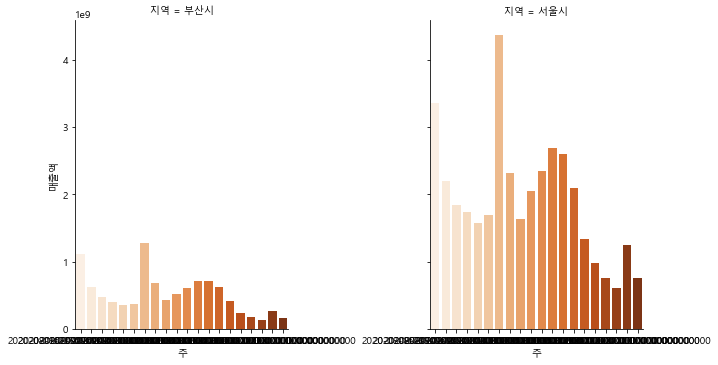

In [324]:
sns.catplot(data = movie_all2, x = '주', y = '매출액', col = '지역', kind = 'bar', 
        palette = 'Oranges', legend_out = False);

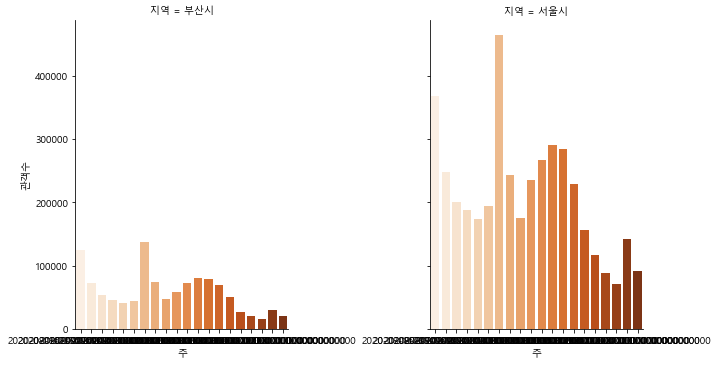

In [325]:
sns.catplot(data = movie_all2, x = '주', y = '관객수', col = '지역', kind = 'bar', 
        palette = 'Oranges', legend_out = False);